# Adaptation Normalization Function
#### The normalization function specifies how a normalized response of a neuron depends on the inputs in the normalization pool

$\gamma = $ overall responsiveness

$\sigma = $ prevents division by $0$, determines how responses saturate with increasing driving input

$n = $ amplifies individual inputs

In [1]:
%matplotlib inline

In [2]:
import numpy as np

gamma = 2.0
sigma = 10.0
n = 2.0 # avg exponent n is btwn 1.0 and 3.5 generally, avg 2 (REFS 48-50)
m = 1
p = 2
beta = 20.0

# j is index 
def normalize(j, lst):
    l = len(lst)
    w_list = np.ones((l, l)) + np.identity(l)
    
    alpha_list = np.ones((l, l)) # * 2 - np.identity(l)
    num = np.power(lst.dot(w_list[j]), n) + beta
    denom = sigma**n + np.power(alpha_list[j].dot(np.power(lst, m)), p)
    return gamma * float(num) / denom

def normalize_lst(lst):
    return np.array([normalize(i, lst) for i in range(len(lst))])

In [3]:
I_list = np.array([20, 4, 16])
I1_list = np.apply_along_axis(lambda x: x*2, 0, I_list)
I2_list = np.apply_along_axis(lambda x: x*4, 0, I_list)

print(normalize_lst(I_list))
print(normalize_lst(I1_list))
print(normalize_lst(I2_list))

print(I_list)
print(I1_list)
print(I2_list)

[ 4.25882353  2.30117647  3.71294118]
[ 4.43692308  2.38892308  3.86584615]
[ 4.48404669  2.41214008  3.9063035 ]
[20  4 16]
[40  8 32]
[80 16 64]


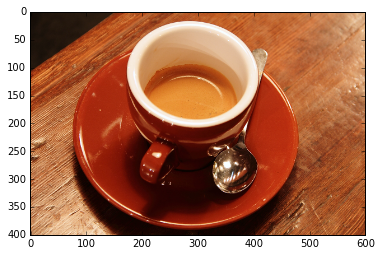

In [4]:
from skimage import data, exposure
from skimage.future import graph
from skimage.transform import rescale
from matplotlib import pyplot as plt

plt.imshow(data.coffee())

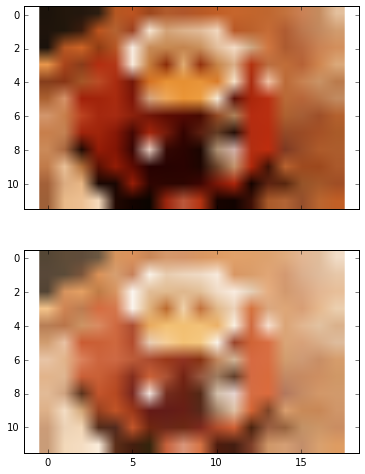

In [5]:
coffee = rescale(data.coffee(), .03)
bright_coffee = exposure.adjust_gamma(coffee, .5)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(coffee)
ax[1].imshow(bright_coffee)

plt.show()

In [10]:
ratio = np.divide(normalize_lst(bright_coffee.flatten()), normalize_lst(coffee.flatten()))
print(ratio)
print(np.mean(ratio))
print(np.std(ratio))

[ 1.0016053   1.00157033  1.00146814  1.00159817  1.00159215  1.00148708
  1.00159665  1.00159274  1.00151345  1.00155533  1.00160581  1.00155514
  0.99958868  1.00113768  1.00160022  0.99945981  1.00117112  1.0016026
  1.00004564  1.00133033  1.00160605  0.99966708  1.00106722  1.00155267
  0.99969103  1.00114307  1.00156731  0.99954487  1.00110501  1.00159175
  0.99936726  1.00102637  1.0015846   0.99927239  1.00092196  1.00155952
  0.99933993  1.00094147  1.00155857  0.99939401  1.00091235  1.00153564
  0.99933941  1.00074377  1.00142713  0.99919703  1.00050682  1.00115875
  0.99930252  1.00032834  1.00101948  0.99870185  0.99939558  1.00004662
  1.00160542  1.00157925  1.00149552  1.0016023   1.00159321  1.00149823
  1.00143708  1.00160573  1.00151103  0.99945043  1.00116971  1.00160571
  0.99961642  1.00096358  1.00152348  1.0000549   1.00138659  1.00160479
  0.99834974  0.99868201  0.9990708   0.99904337  0.99993409  1.00065739
  0.99886294  0.99966401  1.00034372  0.99877273  0.

In [12]:
ratio = np.divide(bright_coffee.flatten(), coffee.flatten())
print(np.mean(ratio))
print(np.std(ratio))
print(ratio)

[  3.00886265   3.63436832   4.74924021   2.67699017   3.32970817
   4.54705132   2.65633407   3.31970001   4.26781978   2.37025633
   2.87710404   3.8142281    1.18205764   1.71038891   2.70889821
   1.16027516   1.73659688   2.75554933   1.27365409   1.89328743
   2.91817922   1.19606648   1.66034838   2.35873618   1.20047087
   1.71449155   2.42815851   1.17448456   1.68637664   2.60094649
   1.14550355   1.63406153   2.53813027   1.13104563   1.57408157
   2.38934201   1.14126998   1.58459488   2.38489672   1.14970181
   1.56900797   2.29297448   1.14118902   1.48963058   2.03258779
   1.12001835   1.4008487    1.72669844   1.1355646    1.34600257
   1.6298006    1.05601153   1.14995021   1.27387921   2.84898418
   3.5197534    4.45759238   2.74873708   3.31175813   4.4289259
   2.05019431   2.97818153   4.29345257   1.15874681   1.73545701
   2.86806667   1.18694557   1.59687194   2.25269325   1.27579762
   1.96810003   2.81922896   1.01761142   1.05371001   1.10238387
   1.098681